> ## NOTE: You are not allowed to use any propriety functions from this notebook in your projects. 

# Capstone Office Hours - Deep NLP

- 01/06/21
- online-ds-ft-081720

## Learning Objectives

- Discuss word Embeddings and their advantages
- Training Word2Vec models
- Using pretrained word embeddings


- Create a Classification Model for true-trump ("Twitter for Android") vs trump-staffer("Twitter for iPhone - from period of time when android was still in use)

    - Use lesson's W2Vec class in Sci-kit learn models
    - Use LSTMs
    - Use RNN/GRUs






- Compare:
    1.  Mean embeddings vs count/tfidf data with scikit learn.
    

<!-- ## References

- My Work-in-Progress Capstone v2.0 Notebook:
    - [GitHub Notebook Link](https://github.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/blob/WIP/Capstone%20Restarted%2010-2020.ipynb) -->

## NLP & Word Vectorization

> **_Natural Language Processing_**, or **_NLP_**, is the study of how computers can interact with humans through the use of human language.  Although this is a field that is quite important to Data Scientists, it does not belong to Data Science alone.  NLP has been around for quite a while, and sits at the intersection of *Computer Science*, *Artificial Intelligence*, *Linguistics*, and *Information Theory*. 

# Word Embeddings

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/embeddings.png">

- Convert words into a vector space
    + Mathematical object
- It's all about closeness
    + Distributional Hypothesis: https://en.wikipedia.org/wiki/Distributional_semantics#Distributional_hypothesis

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/vectors.png">

## Resources

- Kaggle Tutorial:  https://www.kaggle.com/learn/embeddings
- Google Embedding Crash Course: https://developers.google.com/machine-learning/crash-course/embeddings

## Word2Vec

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/training_data.png">

### Skip-Gram Model

- Train the MLP to find the best weights (context) to map word-to-word
- But since words close to another usually contain context, we're _really_ teaching it context in those weights
- Gut check: similar contexted words can be exchanged
    + EX: "A fluffy **dog** is a great pet" <--> "A fluffy **cat** is a great pet"

- By training a text-generation model, we wind up with a lookup table where each word has its own vector 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/new_skip_gram_net_arch.png">


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-using-word2vec-online-ds-ft-100719/master/images/new_word2vec_weight_matrix_lookup_table.png">

## GloVe - Global Vectors for Word Representation

### Transfer Learning

- Usually embeddings are hundreds of dimensions
- Just use the word embeddings already learned from before!
    + Unless very specific terminology, context will likely carry within language
- Comparable to CNN transfer learning

# Sequence Models - Recurrent Neural Networks

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-understanding-recurrent-neural-networks-online-ds-ft-100719/master/images/unrolled.gif">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/rnn.gif">

## LSTMs & GRUs

- GRU (Gated Recurrent Units (GRUs)
    - Reset Gate
    - Update Gate
    
- LSTM (Long Short Term Memory Cells)
   - Input Gate
   - Forget Gate
   - Output Gate

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/RNN-unrolled.png">

Each word will have a vector of contexts: the embeddings!

# Activity: Creating Word Embeddings with Trump's Tweets

In [85]:
from tensorflow.random import set_seed
set_seed(321)

import numpy as np 
np.random.seed(321)

In [86]:
# !pip install -U fsds
from fsds.imports import *

In [87]:
df = fs.datasets.load_nlp_finding_trump(read_csv_kwds={'parse_dates':['created_at'],
                                                      'index_col':'created_at'})
df.sort_index(inplace=True)
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affecte...,12077,65724,False,804333718999539712
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
...,...,...,...,...,...,...
2020-01-01 01:17:43,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,8893,0,True,1212181071988703232
2020-01-01 01:18:47,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,10796,0,True,1212181341078458369
2020-01-01 01:22:28,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,27567,132633,False,1212182267113680896


## Text Classification - Finding Trump

In [88]:
## Getting time period with android tweets
droid_ts = df[df['source'] == 'Twitter for Android'].index
find_trump = df.loc[droid_ts[0]:droid_ts[-1]].copy()

## Getting only original-text (not retweets)
find_trump = find_trump[find_trump['is_retweet']==False]
find_trump

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056


In [89]:
def is_trump(x):
    return 'Trump' if x =='Twitter for Android' else 'Not Trump'
find_trump['is_trump'] = find_trump['source'].map(is_trump)
find_trump['is_trump'].value_counts(dropna=False,normalize=True)

Trump        0.619048
Not Trump    0.380952
Name: is_trump, dtype: float64

In [90]:
target_map = {'Not Trump':0,'Trump':1}

find_trump['target'] = find_trump['is_trump'].map(target_map)
find_trump

,source,text,retweet_count,favorite_count,is_retweet,id_str,is_trump,target
created_at,,,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048,Trump,1
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144,Not Trump,0
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656,Not Trump,0
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240,Trump,1
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504,Trump,1
...,...,...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968,Not Trump,0
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121,Not Trump,0
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056,Not Trump,0


In [91]:
# df = find_trump[['text','is_trump','target']]
# df

## Training Word2Vec

### Resources:

- Two Part Word2Vec Tutorial  (linked from Learn)
    - [Part 1: The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
    - [Part 2: Negative Sampling](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)


- `sentences`: dataset to train on
- `size`: how big of a word vector do we want
- `window`: how many words around the target word to train with
- `min_count`: how many times the word shows up in corpus; we don't want words that are rarely used
- `workers`: number of threads (individual task "workers")

```python
from gensim.models import Word2Vec

# Let's assume we have our text corpus already tokenized and stored inside the variable 'data'--the regular text preprocessing steps still need to be handled before training a Word2Vec model!

model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

model.train(data, total_examples=model.corpus_count)
```

In [92]:
from nltk import word_tokenize, TweetTokenizer
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

In [93]:
## TRAINING WORD2VEC FROM FULL DF NOT JUST TARGETS
data_lower = df['text'].map(lambda x: simple_preprocess(x.lower(),deacc=True,
                                                        max_len=100))
print(df.iloc[0]['text'])
data_lower[0]

My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southeastern United States. Stay safe!


['my',
 'thoughts',
 'and',
 'prayers',
 'are',
 'with',
 'those',
 'affected',
 'by',
 'the',
 'tragic',
 'storms',
 'and',
 'tornadoes',
 'in',
 'the',
 'southeastern',
 'united',
 'states',
 'stay',
 'safe']

In [94]:
wv_model = Word2Vec(data_lower,size=100,window=5,min_count=3)#,workers=4)
wv_model

In [96]:
wv_model.train(data_lower, total_examples=wv_model.corpus_count,epochs=50)

(13572394, 18326300)

In [97]:
## get the keyed vector
wv = wv_model.wv
wv

In [98]:
wv['republican']

array([-1.5186056 ,  1.0432038 , -1.6248196 , -0.5963794 , -0.10912094,
       -1.3959168 , -0.93438447, -3.0586472 ,  2.0369518 ,  2.6508603 ,
       -2.921037  ,  5.8698673 ,  2.4998512 , -1.8337091 ,  1.7159714 ,
       -2.8394873 , -2.333745  , -0.28990367, -1.2357205 ,  1.0747035 ,
        0.5875254 ,  1.6362019 ,  1.0450835 ,  1.0055666 , -0.791718  ,
        2.6869712 , -0.23812768,  0.5108571 , -5.9973717 ,  0.52950597,
       -0.6922795 , -3.684372  ,  3.6396863 , -1.7488122 , -1.5429022 ,
       -2.3110943 , -3.0220711 ,  0.43749195,  1.0387117 , -2.7570548 ,
       -1.5130683 , -1.8573967 ,  1.695199  ,  0.7008838 ,  2.2193706 ,
       -1.2039363 ,  1.9542902 ,  0.49366587, -0.7920619 , -4.291762  ,
        0.2714777 , -4.622125  , -0.7964699 , -0.6809695 ,  2.1424189 ,
       -0.7049987 , -4.1210747 , -1.6962391 ,  1.3691208 , -1.7295369 ,
       -3.3603652 ,  1.8647096 , -0.4581001 ,  1.6188774 , -2.6719227 ,
        1.9066263 ,  0.43146926,  0.7329808 ,  3.2083356 ,  2.62

In [99]:
len(wv.vocab)

7089

In [100]:
## Cosine Similarity 
wv.most_similar('republican')

[('democrat', 0.4990944266319275),
 ('democratic', 0.49159175157546997),
 ('republicans', 0.4493952989578247),
 ('opposition', 0.4251896142959595),
 ('quitting', 0.37795478105545044),
 ('opposing', 0.35771575570106506),
 ('petrified', 0.33704280853271484),
 ('lame', 0.318926066160202),
 ('asset', 0.31869572401046753),
 ('congressmen', 0.3181626796722412)]

In [101]:
wv.most_similar(negative=['democrats'])

[('delivers', 0.414692223072052),
 ('economist', 0.4114968180656433),
 ('azar', 0.3969866931438446),
 ('alex', 0.3676407039165497),
 ('covering', 0.3628000020980835),
 ('greet', 0.3527188003063202),
 ('triumph', 0.3505815863609314),
 ('iagovernor', 0.34022000432014465),
 ('scavino', 0.33930230140686035),
 ('met', 0.33459001779556274)]

In [108]:
            ## Pos words. neg words
options = [ (['cheat'],  []),
           (['election'],['cheat']),
          (['election'],['fraud'])]
for eqn in options:
    print(f"Pos words= {eqn[0]}\tNeg words= {eqn[1]}") 

Pos words= ['cheat']	Neg words= []
Pos words= ['election']	Neg words= ['cheat']
Pos words= ['election']	Neg words= ['fraud']


In [112]:
options = [ (['cheat'],  []),
           (['election'],['cheat']),
          (['election'],['fraud'])]
for (pos,neg) in options:
    print(f"Pos words= {pos}\t\tNeg words= {neg}") 
    results = wv.most_similar(positive=pos,negative=neg)
    [print(word) for word in results]
    print()

Pos words= ['cheat']		Neg words= []
('columbia', 0.37462949752807617)
('behavior', 0.37049365043640137)
('nbc', 0.35910871624946594)
('anna', 0.3583730161190033)
('ballot', 0.35584402084350586)
('then', 0.3556467890739441)
('griffin', 0.3508838415145874)
('expense', 0.3493574261665344)
('everybody', 0.3451763391494751)
('term', 0.33988821506500244)

Pos words= ['election']		Neg words= ['cheat']
('humiliating', 0.3256770372390747)
('example', 0.3233208656311035)
('inaugurated', 0.31980100274086)
('points', 0.3133443593978882)
('gopchairwoman', 0.3092685639858246)
('figured', 0.3078387975692749)
('confidence', 0.30351686477661133)
('touch', 0.2925059199333191)
('washtimes', 0.2837539315223694)
('decade', 0.27932703495025635)

Pos words= ['election']		Neg words= ['fraud']
('washington', 0.36493197083473206)
('office', 0.3504166603088379)
('elections', 0.318131685256958)
('you', 0.28754714131355286)
('elect', 0.2865354120731354)
('market', 0.28572016954421997)
('paris', 0.28151121735572815

In [106]:
wv.most_similar(positive=[],negative=[])

#### Word2Vec params

```python
## For initializing model
sentences=None,
    size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    iter=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    
    
## For training 
    sentences,
    total_examples=None,
    total_words=None,
    epochs=None,
    start_alpha=None,
    end_alpha=None,
    word_count=0,
    queue_factor=2,
    report_delay=1.0,
    compute_loss=False,
    callbacks=(),
    ```

In [104]:
# ### USING WORD VECTOR MATH TO GET A FEEL FOR QUALITY OF MODE
def word_math(wv,pos_words=['hillary'],neg_words=['bill'],
              verbose=True,return_vec=False):
    if isinstance(pos_words,str):
        pos_words=[pos_words]
    if isinstance(neg_words,str):
        neg_words=[neg_words]


    pos_eqn = '+'.join(pos_words)
    neg_eqn = '-'.join(neg_words)

    print('---'*15)    
    print(f"[i] Result for:\t{pos_eqn}{' - '+neg_eqn if len(neg_eqn)>0 else ' '}")
    print('---'*15)

    answer = wv.most_similar(positive=pos_words,negative=neg_words)
    
    if verbose:
          [print(f"- {ans[0]} ({round(ans[1],3)})") for ans in answer]
          print('---'*15,'\n\n')

    if return_vec: 
          return answer
    

In [105]:
## [Positive], [negatigve words]
equation_list=[(['america','crime'],[]),
               
               (['democrats','russia'],[]),
               (['republican'],['honor']),
               (['man','power'],[]),
               (['russia','honor'],[]),
              (['china','tariff'])]

for eqn in equation_list:
#     print('\n\n')
    word_math(wv,*eqn)
#     word_math(wv2,*eqn)

---------------------------------------------
[i] Result for:	america+crime 
---------------------------------------------
- borders (0.457)
- criminals (0.365)
- taxes (0.36)
- your (0.357)
- ineffective (0.331)
- california (0.326)
- amendment (0.322)
- our (0.317)
- november (0.316)
- sanctuary (0.312)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	democrats+russia 
---------------------------------------------
- dems (0.648)
- they (0.551)
- russian (0.495)
- facts (0.392)
- russians (0.38)
- doj (0.373)
- obstruction (0.371)
- mueller (0.366)
- hoax (0.348)
- dem (0.347)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	republican - honor
---------------------------------------------
- republicans (0.472)
- democrat (0.412)
- socialists (0.387)
- switch (0.374)
- obstruct (0.374)
- dem (0.374)
- democratic (0.366)
- extreme (0.358)
- weak (0.324)
- liberal (

## Using Embeddings in Classification

### Embedding Layers
You should make note of a couple caveats that come with using embedding layers in your neural network -- namely:

* The embedding layer must always be the first layer of the network, meaning that it should immediately follow the `Input()` layer 
* All words in the text should be integer-encoded, with each unique word encoded as it's own unique integer  
* The size of the embedding layer must always be greater than the total vocabulary size of the dataset! The first parameter denotes the vocabulary size, while the second denotes the size of the actual word vectors
* The size of the sequences passed in as data must be set when creating the layer (all data will be converted to padded sequences of the same size during the preprocessing step) 


[Keras Documentation for Embedding Layers](https://keras.io/layers/embeddings/).

### References to Try
- https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/
- https://stackoverflow.com/questions/51492778/how-to-properly-use-get-keras-embedding-in-gensim-s-word2vec
- https://gist.github.com/codekansas/15b3c2a2e9bc7a3c345138a32e029969

## Using Embedding Layers in ANN

In [113]:
## IMPORTING PYTHON FILE
import os,sys
sys.path.append("../")
import keras_gridsearch as kg


## Auto-reload mpdule 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.utils import to_categorical
# from keras.preprocessing.sequence import pad_sequences

In [115]:
## Now only using find_trump tweets
df = find_trump[['text','is_trump','target']]
df

,text,is_trump,target
created_at,,,
2016-12-01 14:38:09,Getting ready to leave for the Great State of ...,Trump,1
2016-12-01 22:52:10,Heading to U.S. Bank Arena in Cincinnati Ohio ...,Not Trump,0
2016-12-02 02:45:18,Thank you Ohio! Together we made history – and...,Not Trump,0
2016-12-03 00:44:20,The President of Taiwan CALLED ME today to wis...,Trump,1
2016-12-03 01:41:30,Interesting how the U.S. sells Taiwan billions...,Trump,1
...,...,...,...
2017-03-24 17:03:46,Today I was pleased to announce the official a...,Not Trump,0
2017-03-24 17:59:42,Today I was thrilled to announce a commitment ...,Not Trump,0
2017-03-25 13:29:17,Happy #MedalOfHonorDay to our heroes! ➡️https:...,Not Trump,0


In [116]:
from keras.preprocessing import text,sequence
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from gensim.utils import simple_preprocess
from sklearn import metrics

In [117]:
X = df['text']
y = df['target']
y

created_at
2016-12-01 14:38:09    1
2016-12-01 22:52:10    0
2016-12-02 02:45:18    0
2016-12-03 00:44:20    1
2016-12-03 01:41:30    1
                      ..
2017-03-24 17:03:46    0
2017-03-24 17:59:42    0
2017-03-25 13:29:17    0
2017-03-25 14:37:52    1
2017-03-25 14:41:14    1
Name: target, Length: 588, dtype: int64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123) 
X_train.shape,y_test.shape
# pd.Series(y_test).value_counts(normalize=True)
y_test.shape
X_test

created_at
2017-01-20 12:31:53    It all begins today! I will see you at 11:00 A...
2016-12-12 13:21:20    Unless you catch "hackers" in the act it is ve...
2017-03-25 14:41:14    Watch @JudgeJeanine on @FoxNews tonight at 9:0...
2017-01-09 11:36:02    Hillary flunky who lost big. For the 100th tim...
2017-02-04 23:37:59    Why aren't the lawyers looking at and using th...
                                             ...                        
2017-01-15 20:04:38    Thank you to Bob Woodward who said "That is a ...
2016-12-13 12:44:06    The thing I like best about Rex Tillerson is t...
2017-01-07 03:53:38    Gross negligence by the Democratic National Co...
2017-01-04 13:19:09    Thank you to Ford for scrapping a new plant in...
2017-01-07 15:10:46    have enough problems around the world without ...
Name: text, Length: 147, dtype: object

### Computer Class Weights

In [32]:
## Class imbalance
y_train.value_counts(1)

1    0.603175
0    0.396825
Name: target, dtype: float64

In [119]:
from sklearn.utils.class_weight import compute_class_weight

weights= compute_class_weight(
           'balanced',
            np.unique(y_train), 
            y_train)

weights_dict = dict(zip( np.unique(y_train),weights))
weights_dict

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass classes=[0 1], y=created_at
2016-12-12 13:26:13    1
2017-03-10 15:40:53    0
2017-01-06 12:05:01    1
2017-03-05 11:40:20    1
2017-02-20 14:15:42    1
                      ..
2016-12-22 16:50:30    1
2017-01-29 23:28:50    0
2017-02-08 15:23:29    0
2017-02-05 20:42:33    1
2017-03-04 13:19:29    1
Name: target, Length: 441, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error



{0: 1.26, 1: 0.8289473684210527}

In [121]:
## Make OHE y vars
y_train_seq = to_categorical(y_train)
y_test_seq = to_categorical(y_test)
y_train_seq#.shape

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [125]:
## TOKENIZE TEXT
MAX_WORDS = 25000
# MAX_SEQUENCE_LENGTH = 40

tokenizer = text.Tokenizer(num_words=MAX_WORDS)

tokenizer.fit_on_texts(X_train) #df['text'])
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)#df['text'])


## Find the longest sequence
seq_lenghts = list(map(lambda x: len(x),[*train_sequences,*test_sequences]))
max(seq_lenghts)

31

In [127]:
train_sequences[0]

[1,
 417,
 418,
 419,
 3,
 258,
 10,
 44,
 4,
 320,
 589,
 4,
 321,
 99,
 3,
 12,
 13,
 936,
 17,
 322,
 3,
 223,
 590,
 76,
 194,
 224]

In [124]:
## Pad sequences
X_train_seq = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)

X_test_seq = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train_seq

array([[   0,    0,    0, ...,   76,  194,  224],
       [   0,    0,    0, ...,    6,    7,  939],
       [   0,    0,    0, ...,    5,   14,  327],
       ...,
       [   0,    0,    0, ...,    6,    7, 2296],
       [   0,    0,    0, ...,  191,   32,  878],
       [   0,    0,    0, ...,    2,   14,  327]], dtype=int32)

In [37]:
len(tokenizer.index_word)

2302

In [38]:
X_train_seq[-1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2300, 2301,  697, 2302,  506,
          1,  446,   50,   33,  887,   28,  143,   75,  843,  228,   30,
         28,   42,  334,  475,    2,   14,  327], dtype=int32)

In [39]:
# y_classes = df['target']
# y_classes.value_counts(1)
MAX_WORDS

25000

In [151]:
from tensorflow.keras.callbacks import EarlyStopping

def get_earlystop(monitor='val_loss',patience=5, restore_best_weights=False):
    """"""
    args = locals()
    return EarlyStopping(**args)

get_earlystop.__doc__+=EarlyStopping.__doc__
# get_earlystop

In [131]:
 #where codealong get this?
def make_model1(EMBEDDING_SIZE = 128):
    model=Sequential()

    model.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))
    model.add(LSTM(50,return_sequences=False))
#     model.add(GlobalMaxPool1D()) 
#     model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

In [132]:
model = make_model1()
history = model.fit(X_train_seq, y_train_seq, epochs=50,
                    batch_size=32, validation_split=0.2,callbacks=get_earlystop(),
                   class_weight=weights_dict)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 128)         3200000   
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                35800     
_________________________________________________________________
dense_26 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_8 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 52        
Total params: 3,237,127
Trainable params: 3,237,127
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/50
11/11 [==============================] - 4s 241ms/step - loss: 0.6950 - accuracy: 0.5497 - val_loss: 0.6684 - val_accuracy: 0.8876
Epoch 2/50
11/11 [==============================] - 0s 45ms/step - loss: 0.6550 - accuracy: 0.8271 - val_loss: 0.5863 - val_accuracy: 0.8539
Epoch 3/50
11/11 [==============================] - 1s 51ms/step - loss: 0.5291 - accuracy: 0.8689 - val_loss: 0.4053 - val_accuracy: 0.8539
Epoch 4/50
11/11 [==============================] - 1s 53ms/step - loss: 0.3181 - accuracy: 0.9035 - val_loss: 0.4481 - val_accuracy: 0.8090


In [133]:
y_hat_test = model.predict(X_test_seq).argmax(axis=1)
y_hat_test[:5]

array([1, 1, 0, 1, 0])

In [134]:
y_test_seq.argmax(axis=1)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

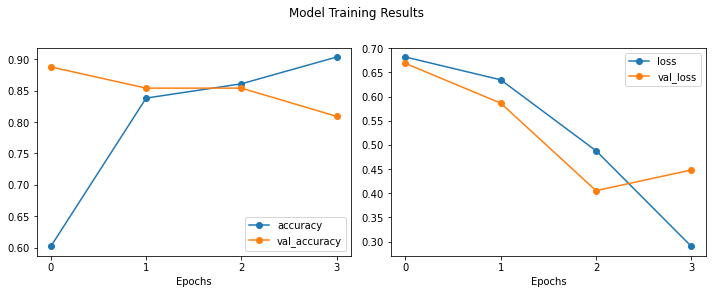



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        49
           1       0.89      0.79      0.83        98

    accuracy                           0.79       147
   macro avg       0.77      0.79      0.77       147
weighted avg       0.81      0.79      0.79       147



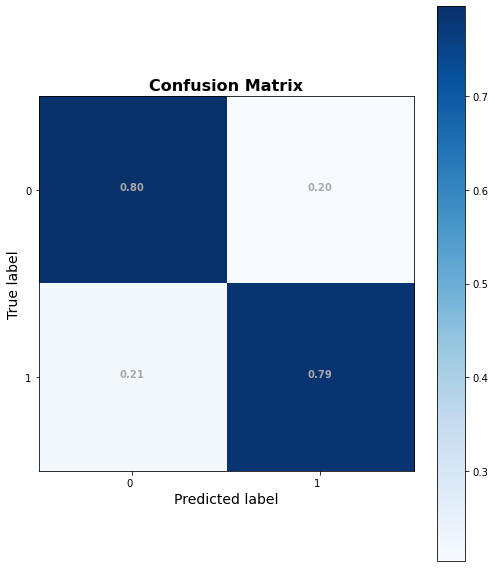

In [135]:
# print(pd.Series(y_hat_test).value_counts())
kg.evaluate_model(y_test_seq,y_hat_test,history)

# Using Pre-Trained Vectors

## Using Our Word2Vec in Keras Embedding 

In [ ]:
        
# embedding_layer = Embedding(len(total_vocabulary) + 1,
#                             EMBEDDING_SIZE,
#                             weights=[embedding_matrix],
#                             input_length=MAX_SEQUENCE_LENGTH,
#                             trainable=True)

In [136]:
wv.get_keras_embedding()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, None, 100)         708900    
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_36 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_13 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 52        
Total params: 740,427
Trainable params: 31,527
Non-trainable params: 708,900
_________________________________________________________________


None

Epoch 1/50
11/11 [==============================] - 3s 87ms/step - loss: 0.6899 - accuracy: 0.4773 - val_loss: 0.5855 - val_accuracy: 0.7191
Epoch 2/50
11/11 [==============================] - 1s 116ms/step - loss: 0.5954 - accuracy: 0.6855 - val_loss: 0.5125 - val_accuracy: 0.7978
Epoch 3/50
11/11 [==============================] - 0s 21ms/step - loss: 0.5465 - accuracy: 0.7631 - val_loss: 0.4620 - val_accuracy: 0.8202
Epoch 4/50
11/11 [==============================] - 0s 24ms/step - loss: 0.4510 - accuracy: 0.8103 - val_loss: 0.4233 - val_accuracy: 0.8427
Epoch 5/50
11/11 [==============================] - 0s 22ms/step - loss: 0.4174 - accuracy: 0.8593 - val_loss: 0.3993 - val_accuracy: 0.8539
Epoch 6/50
11/11 [==============================] - 0s 21ms/step - loss: 0.3432 - accuracy: 0.9186 - val_loss: 0.3797 - val_accuracy: 0.8652
Epoch 7/50
11/11 [==============================] - 0s 22ms/step - loss: 0.3192 - accuracy: 0.9031 - val_loss: 0.3622 - val_accuracy: 0.8652
Epoch 8/50
1

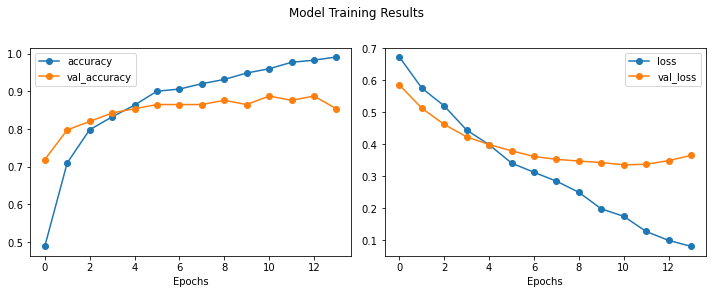



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        49
           1       0.87      0.92      0.90        98

    accuracy                           0.86       147
   macro avg       0.85      0.83      0.83       147
weighted avg       0.86      0.86      0.86       147



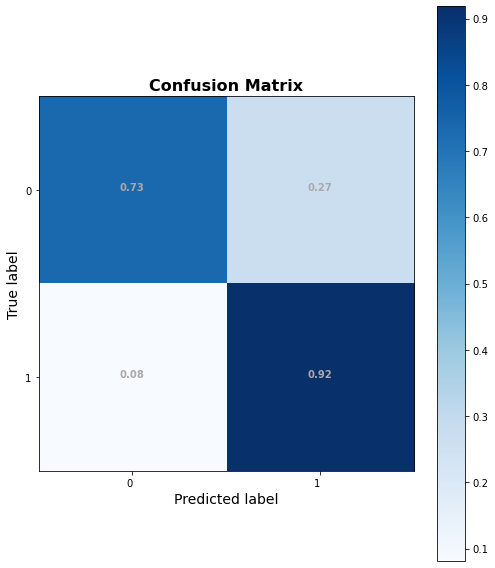

In [146]:
 #where codealong get this?
def make_model_wv(wv):
    model=Sequential()

    model.add(wv.get_keras_embedding())#Embedding(MAX_WORDS, EMBEDDING_SIZE))
    model.add(LSTM(50,return_sequences=False))

    # model.add(GlobalMaxPool1D()) 
    # model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

model = make_model_wv(wv)
history = model.fit(X_train_seq, y_train_seq, epochs=50,
                    batch_size=32, validation_split=0.2,
                    callbacks=get_earlystop(),
                   class_weight=weights_dict)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)
kg.evaluate_model(y_test_seq,y_hat_test,history)

## Using GLOVE

In [74]:
import os
folder = '/Users/jamesirving/Datasets/'#glove.twitter.27B/'
# print(os.listdir(folder))
glove_file = folder+'glove.6B/glove.6B.50d.txt'#'glove.twitter.27B.50d.txt'
glove_twitter_file = folder+'glove.twitter.27B/glove.twitter.27B.50d.txt'
print(glove_file)
print(glove_twitter_file)

/Users/jamesirving/Datasets/glove.6B/glove.6B.50d.txt
/Users/jamesirving/Datasets/glove.twitter.27B/glove.twitter.27B.50d.txt


#### Keeping only the vectors needed

In [48]:
# ## This line of code for getting all words bugs me
# total_vocabulary = set(word for tweet in data_lower for word in tweet)
# len(total_vocabulary)

In [49]:
# glove = {}
# with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
#     for line in f:
#         parts = line.split()
#         word = parts[0].decode('utf-8')
#         if word in total_vocabulary:
#             vector = np.array(parts[1:], dtype=np.float32)
#             glove[word] = vector

### Converting Glove to Word2Vec format

- Getting glove into w2vec format:
    - https://radimrehurek.com/gensim/scripts/glove2word2vec.html

In [140]:
glove_folder = folder+'glove.twitter.27B'
os.listdir(glove_folder)

['glove.twitter.27B.100d.txt',
 'glove.twitter.27B.50d.txt',
 'glove_to_w2vec.txt',
 'glove.twitter.27B.25d.txt',
 'glove.twitter.27B.200d.txt']

In [141]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath(glove_twitter_file)
tmp_file = get_tmpfile(glove_folder+'glove_to_w2vec.txt')
_ = glove2word2vec(glove_file, tmp_file)
model_glove = KeyedVectors.load_word2vec_format(tmp_file)

In [142]:
model_glove.wv

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [147]:
model_glove['republican']

array([ 1.6157  , -0.25904 ,  0.72508 ,  1.0425  ,  0.13052 , -0.043748,
        0.47838 ,  1.335   ,  0.46798 , -1.0906  , -0.38838 , -1.2271  ,
       -2.4627  , -0.31811 ,  1.4408  , -0.30102 , -0.13989 ,  0.38727 ,
        1.4973  ,  0.7543  ,  0.17385 ,  0.11997 , -0.48673 , -0.43429 ,
        1.041   ,  1.392   ,  0.44031 ,  0.31378 , -0.86916 ,  0.9268  ,
        0.81152 ,  0.71418 ,  0.042411,  0.12692 ,  0.67654 ,  1.1624  ,
        0.11309 ,  0.92866 , -0.19608 , -1.0142  ,  0.12632 ,  0.39504 ,
        0.38305 , -0.062614,  0.6588  , -0.15264 ,  0.3511  ,  0.16505 ,
       -0.50478 , -0.10917 ], dtype=float32)

In [143]:
## Using pre-trained embeddings for math
equation_list=[(['america','crime'],[]),
               
               (['democrats','russia'],[]),
               (['republican'],['honor']),
               (['man','power'],[]),
               (['russia','honor'],[]),
              (['china','tariff'])]

for eqn in equation_list:
#     print('\n\n')
    word_math(model_glove,*eqn)

---------------------------------------------
[i] Result for:	america+crime 
---------------------------------------------
- american (0.849)
- country (0.811)
- criminal (0.805)
- society (0.8)
- africa (0.794)
- death (0.793)
- the (0.792)
- world (0.789)
- states (0.788)
- attack (0.784)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	democrats+russia 
---------------------------------------------
- republicans (0.869)
- conservatives (0.841)
- ukraine (0.839)
- government (0.835)
- americans (0.831)
- liberals (0.821)
- britain (0.816)
- u.s. (0.814)
- immigration (0.813)
- states (0.81)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	republican - honor
---------------------------------------------
- tsx (0.656)
- trinamool (0.654)
- nesunan (0.653)
- mantashe (0.639)
- mutungan (0.637)
- مقدسي (0.634)
- nyambungan (0.633)
- مسئولون (0.628)
- melumelu (0.628

___ 

___

### Using Glove In Embedding Layer

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, None, 50)          59675700  
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_38 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_14 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 52        
Total params: 59,697,227
Trainable params: 21,527
Non-trainable params: 59,675,700
_________________________________________________________________


None

Epoch 1/50
11/11 [==============================] - 3s 71ms/step - loss: 0.7025 - accuracy: 0.5290 - val_loss: 0.6328 - val_accuracy: 0.7303
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6314 - accuracy: 0.6679 - val_loss: 0.5638 - val_accuracy: 0.8202
Epoch 3/50
11/11 [==============================] - 0s 19ms/step - loss: 0.5868 - accuracy: 0.7054 - val_loss: 0.5017 - val_accuracy: 0.8539
Epoch 4/50
11/11 [==============================] - 0s 22ms/step - loss: 0.5505 - accuracy: 0.7702 - val_loss: 0.4617 - val_accuracy: 0.8315
Epoch 5/50
11/11 [==============================] - 0s 23ms/step - loss: 0.4914 - accuracy: 0.7725 - val_loss: 0.4320 - val_accuracy: 0.8315
Epoch 6/50
11/11 [==============================] - 0s 21ms/step - loss: 0.4384 - accuracy: 0.8311 - val_loss: 0.4481 - val_accuracy: 0.7865


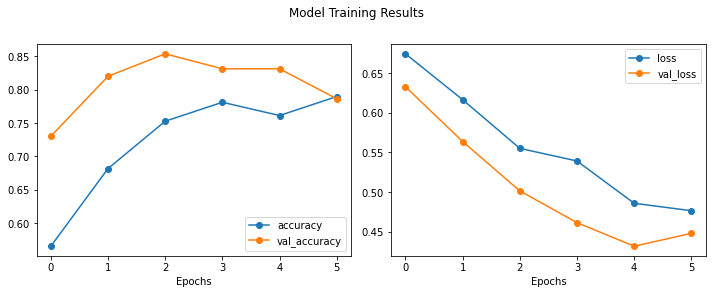



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.86      0.68        49
           1       0.90      0.66      0.76        98

    accuracy                           0.73       147
   macro avg       0.73      0.76      0.72       147
weighted avg       0.79      0.73      0.74       147



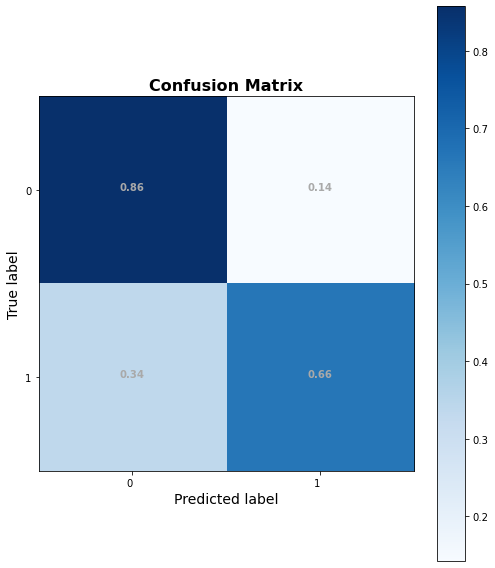

In [148]:
 #where codealong get this?
def make_model_glove(wv):
    model=Sequential()

    model.add(wv.get_keras_embedding())#Embedding(MAX_WORDS, EMBEDDING_SIZE))
    model.add(LSTM(50,return_sequences=False))

    # model.add(GlobalMaxPool1D()) 
    # model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

model = make_model_wv(model_glove)
history = model.fit(X_train_seq, y_train_seq, epochs=50,
                    batch_size=32, validation_split=0.2,
                    callbacks=get_earlystop(),
                   class_weight=weights_dict)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)
kg.evaluate_model(y_test_seq,y_hat_test,history)

# Multiple LSTM / Bidirectional 

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, None, 100)         708900    
_________________________________________________________________
lstm_34 (LSTM)               (None, None, 50)          30200     
_________________________________________________________________
dropout_24 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_50 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_25 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 2)               

None

Epoch 1/50
11/11 [==============================] - 4s 98ms/step - loss: 0.6349 - accuracy: 0.5614 - val_loss: 0.5197 - val_accuracy: 0.7865
Epoch 2/50
11/11 [==============================] - 0s 35ms/step - loss: 0.5226 - accuracy: 0.7926 - val_loss: 0.4383 - val_accuracy: 0.8539
Epoch 3/50
11/11 [==============================] - 0s 38ms/step - loss: 0.4115 - accuracy: 0.8420 - val_loss: 0.4170 - val_accuracy: 0.8539
Epoch 4/50
11/11 [==============================] - 0s 36ms/step - loss: 0.4013 - accuracy: 0.8929 - val_loss: 0.4957 - val_accuracy: 0.7753
Epoch 5/50
11/11 [==============================] - 0s 39ms/step - loss: 0.4278 - accuracy: 0.8291 - val_loss: 0.4015 - val_accuracy: 0.8652
Epoch 6/50
11/11 [==============================] - 0s 35ms/step - loss: 0.3320 - accuracy: 0.9259 - val_loss: 0.4859 - val_accuracy: 0.8202
Epoch 7/50
11/11 [==============================] - 0s 38ms/step - loss: 0.2534 - accuracy: 0.9578 - val_loss: 0.4374 - val_accuracy: 0.8539
Epoch 8/50
11

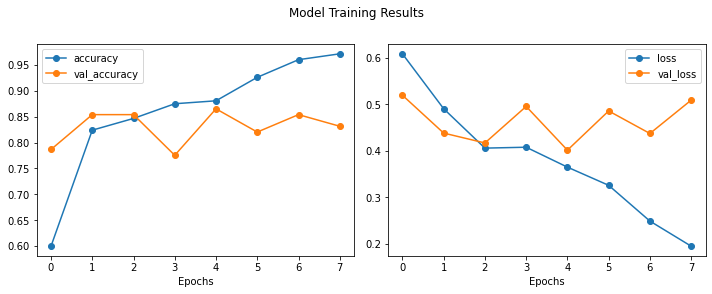



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        49
           1       0.86      0.91      0.89        98

    accuracy                           0.84       147
   macro avg       0.83      0.81      0.82       147
weighted avg       0.84      0.84      0.84       147



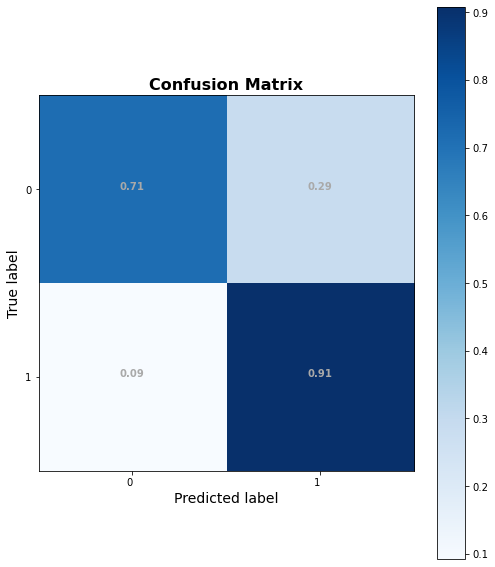

In [158]:
 #where codealong get this?
def make_model_2lstm(wv):
    model=Sequential()

    model.add(wv.get_keras_embedding())#Embedding(MAX_WORDS, EMBEDDING_SIZE))
    model.add(LSTM(50,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(50,return_sequences=False,recurrent_dropout=0.3))

    # model.add(GlobalMaxPool1D()) 
    # model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu',activity_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

model = make_model_2lstm(wv)
history = model.fit(X_train_seq, y_train_seq, epochs=50,
                    batch_size=32, validation_split=0.2,
                    callbacks=get_earlystop(patience=3),
                   class_weight=weights_dict)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)
kg.evaluate_model(y_test_seq,y_hat_test,history)

## Bidirectional

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, None, 100)         708900    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense_58 (Dense)             (None, 25)                2525      
_________________________________________________________________
dropout_27 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 52        
Total params: 771,877
Trainable params: 62,977
Non-trainable params: 708,900
_________________________________________________________________


None

Epoch 1/50
11/11 [==============================] - 3s 90ms/step - loss: 0.6739 - accuracy: 0.5213 - val_loss: 0.5341 - val_accuracy: 0.8652
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.5520 - accuracy: 0.8000 - val_loss: 0.4312 - val_accuracy: 0.8764
Epoch 3/50
11/11 [==============================] - 0s 22ms/step - loss: 0.4418 - accuracy: 0.8534 - val_loss: 0.3875 - val_accuracy: 0.8764
Epoch 4/50
11/11 [==============================] - 0s 22ms/step - loss: 0.3707 - accuracy: 0.8809 - val_loss: 0.3787 - val_accuracy: 0.8876
Epoch 5/50
11/11 [==============================] - 0s 21ms/step - loss: 0.3477 - accuracy: 0.8703 - val_loss: 0.3470 - val_accuracy: 0.8764
Epoch 6/50
11/11 [==============================] - 0s 22ms/step - loss: 0.2533 - accuracy: 0.9322 - val_loss: 0.3591 - val_accuracy: 0.9101
Epoch 7/50
11/11 [==============================] - 0s 24ms/step - loss: 0.2125 - accuracy: 0.9477 - val_loss: 0.3368 - val_accuracy: 0.8989
Epoch 8/50
11

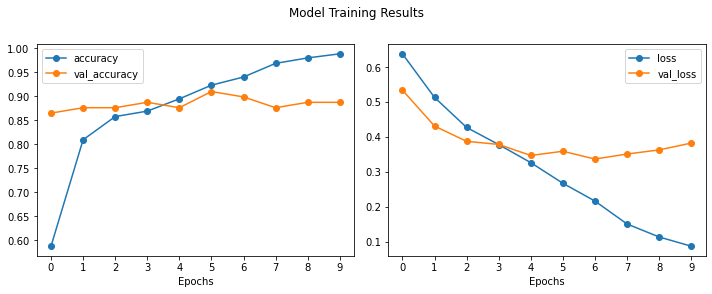



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        49
           1       0.88      0.91      0.89        98

    accuracy                           0.86       147
   macro avg       0.84      0.83      0.84       147
weighted avg       0.86      0.86      0.86       147



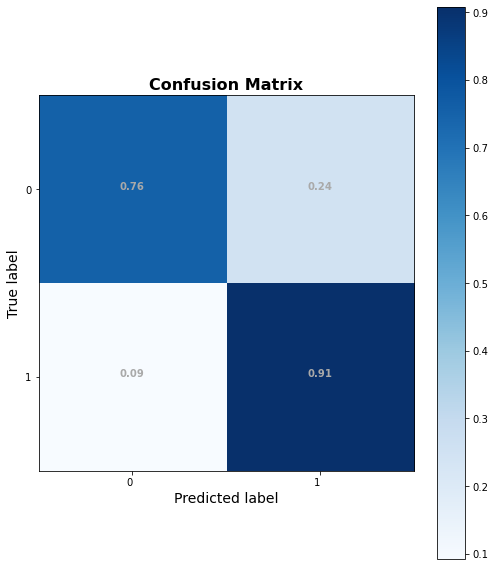

In [163]:
 #where codealong get this?
from tensorflow.keras.layers import Bidirectional
def make_model_2lstm(wv):
    model=Sequential()

    model.add(wv.get_keras_embedding())#Embedding(MAX_WORDS, EMBEDDING_SIZE))
    model.add(Bidirectional(LSTM(50)))

    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

model = make_model_2lstm(wv)
history = model.fit(X_train_seq, y_train_seq, epochs=50,
                    batch_size=32, validation_split=0.2,
                    callbacks=get_earlystop(patience=3),
                   class_weight=weights_dict)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)
kg.evaluate_model(y_test_seq,y_hat_test,history)

# APPENDIX

### Alternative Approach to Loading in Glove

In [ ]:

# EMBEDDING_SIZE = 128 #where codealong get this?

# embedding_matrix = np.zeros((len(total_vocabulary) + 1, EMBEDDING_SIZE))
# for word, i in enumerate(total_vocabulary):#.items():
#     embedding_vector = glove.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector
        
        
# embedding_layer = Embedding(len(total_vocabulary) + 1,
#                             EMBEDDING_SIZE,
#                             weights=[embedding_matrix],
#                             input_length=MAX_SEQUENCE_LENGTH,
#                             trainable=True)

## RNN or GRU

In [190]:
## GRU Model
from keras import models, layers, optimizers, regularizers
modelG = models.Sequential()

## Get and add embedding_layer
# embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
modelG.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))

# modelG.add(layers.SpatialDropout1D(0.5))
# modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)))
modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2)))
modelG.add(layers.Dense(2, activation='softmax'))

modelG.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
modelG.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, None, 128)         3200000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               138000    
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 402       
Total params: 3,338,402
Trainable params: 3,338,402
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
11/11 [==============================] - 5s 159ms/step - loss: 0.6792 - acc: 0.5621 - val_loss: 0.6830 - val_acc: 0.5506
Epoch 2/10
11/11 [==============================] - 1s 108ms/step - loss: 0.6330 - acc: 0.6109 - val_loss: 0.5313 - val_acc: 0.8764
Epoch 3/10
11/11 [==============================] - 1s 109ms/step - loss: 0.4443 - acc: 0.8416 - val_loss: 0.3341 - val_acc: 0.8539
Epoch 4/10
11/11 [==============================] - 1s 105ms/step - loss: 0.2291 - acc: 0.9060 - val_loss: 0.4489 - val_acc: 0.8315
Epoch 5/10
11/11 [==============================] - 1s 116ms/step - loss: 0.1663 - acc: 0.9623 - val_loss: 0.3667 - val_acc: 0.8989
Epoch 6/10
11/11 [==============================] - 1s 116ms/step - loss: 0.0633 - acc: 0.9846 - val_loss: 0.4279 - val_acc: 0.8652
Epoch 7/10
11/11 [==============================] - 1s 106ms/step - loss: 0.0218 - acc: 0.9914 - val_loss: 0.5903 - val_acc: 0.8652
Epoch 8/10
11/11 [==============================] - 1s 107ms/step - loss: 0.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



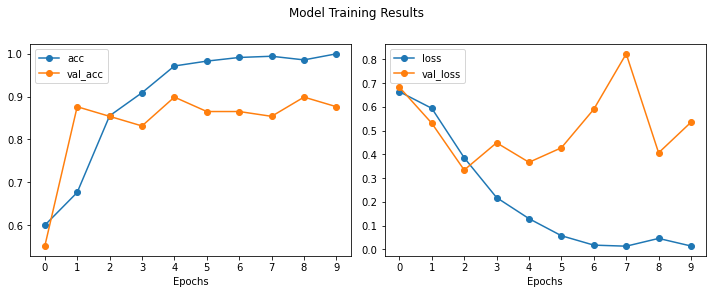



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        49
           1       0.89      0.95      0.92        98

    accuracy                           0.88       147
   macro avg       0.88      0.85      0.86       147
weighted avg       0.88      0.88      0.88       147



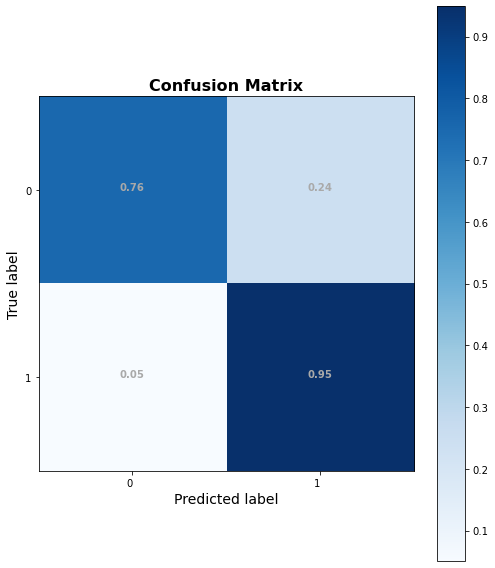

In [191]:

history = modelG.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2)

y_hat_test = modelG.predict_classes(X_test_seq)
kg.evaluate_model(y_test_seq,y_hat_test,history)

## Alternative Dataset

In [1]:
# import os
# ## New Dataset Option
# # import kaggle.api as kaggle
# !kaggle datasets download -d akash14/product-sentiment-classification
# !unzip product-sentiment-classification.zip
# !rm product-sentiment-classification.zip

> Class - Represents various sentiments
- 0 - Cannot Say
- 1 - Negative
- 2 - Positive
- 3 - No Sentimet

In [2]:
# import pandas as pd
# folder = 'Participants_Data/'
# sorted(os.listdir(folder))
# df = pd.read_csv('Participants_Data/Train.csv',index_col=0)
# df

In [3]:
# mapper = {0: 'Cannot Say', 
#           1 : 'Negative',
#           2 : 'Positive',
#           3 : 'No Sentimet'}
# mapper

In [4]:
# df["Sentiment-label"] = df['Sentiment'].map(mapper)

In [5]:
# df['Sentiment-label'].value_counts(1)

In [6]:
## Drop Cannot Say 
